In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

DGS2 : Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity

DGS3 : Market Yield on U.S. Treasury Securities at 3-Year Constant Maturity

DGS5 : Market Yield on U.S. Treasury Securities at 5-Year Constant Maturity

DGS10 : Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity

all yields for canadian bonds were downloaded from https://www.bankofcanada.ca/rates/interest-rates/canadian-bonds/ in a csv file  cadbond.csv

COLUMS USED:

BD.CDN.2YR.DQ.YLD : Market Yield on Canadian Treasury Securities at 2-Year Constant Maturity

BD.CDN.3YR.DQ.YLD : Market Yield on Canadian Treasury Securities at 2-Year Constant Maturity

BD.CDN.5YR.DQ.YLD : Market Yield on Canadian Treasury Securities at 2-Year Constant Maturity

BD.CDN.10YR.DQ.YLD : Market Yield on Canadian Treasury Securities at 10-Year Constant Maturity

In [114]:
cad = pd.read_csv('data/dataset/cadbond.csv', index_col=0, parse_dates=True)
usd = pd.read_csv('data/dataset/usdbond.csv', index_col=0, parse_dates=True)


In [115]:
usd.rename(columns={'DGS2':'2Y', 'DGS3':'3Y', 'DGS5':'5Y', 'DGS10':'10Y'}, inplace=True)
cad.rename(columns={'BD.CDN.2YR.DQ.YLD':'2Y', 'BD.CDN.3YR.DQ.YLD':'3Y', 'BD.CDN.5YR.DQ.YLD':'5Y', 'BD.CDN.10YR.DQ.YLD':'10Y'}, inplace=True)

<AxesSubplot: xlabel='DATE'>

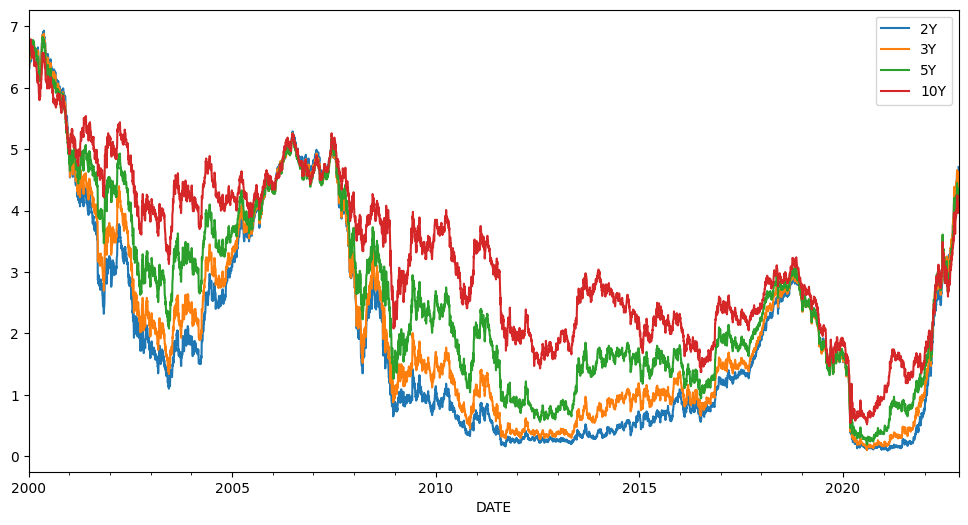

In [116]:
usd.ffill(inplace=True)
usd.plot(figsize=(12,6))

<AxesSubplot: xlabel='date'>

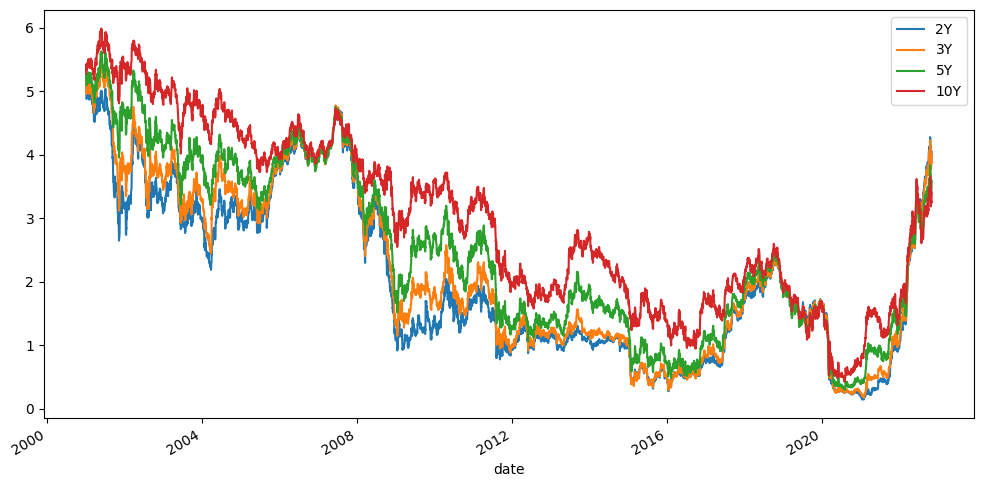

In [117]:
cad.ffill(inplace=True)
cad.plot(figsize=(12,6))

In [118]:
start = max([usd.index.min(), cad.index.min()])
end = min([usd.index.max(), cad.index.max()])
cad = cad.loc[start:end]
usd = usd.loc[start:end]

In [152]:
# finding the yield difference between the two countries
diff = usd - cad

In [153]:
diff.index = [d.date() for d in diff.index]
diff.index = pd.to_datetime(diff.index)

In [154]:
diff['convex1'] = diff['3Y'] - diff['2Y']
diff['convex2'] = diff['5Y'] - diff['3Y']
diff['convex3'] = diff['10Y'] - diff['5Y']
diff.index

DatetimeIndex(['2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05',
               '2001-01-08', '2001-01-09', '2001-01-10', '2001-01-11',
               '2001-01-12', '2001-01-15',
               ...
               '2022-10-21', '2022-10-24', '2022-10-25', '2022-10-26',
               '2022-10-27', '2022-10-28', '2022-10-31', '2022-11-01',
               '2022-11-02', '2022-11-03'],
              dtype='datetime64[ns]', length=5698, freq=None)

In [165]:
y_df = pd.read_csv('data/dataset/usdcad.csv', index_col=0, parse_dates=True)

In [178]:
X = diff

df = pd.merge(X, y_df, left_index=True, right_index=True)
df = df.dropna()
y = df.pop('DEXCAUS')
X = df
X.to_csv('data/dataset/bond_yields.csv')

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [176]:
model.score(X, y)

0.542429915163557

In [179]:
var_exp = pd.read_csv('var_exp_df.csv', index_col=0)

In [ ]:
df = pd.merge(X, y_df, left_index=True, right_index=True)
